In [171]:
#importer les packages
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import random
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers
# TensorFlow and tf.keras
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)



target_format = 'UTF-8'

2.4.0


In [172]:
#entrainement du model
model = VGG16()

In [173]:
# Importation des images
img0 = load_img('/content/0.jpg', target_size=(224, 224))
img1 = load_img('/content/1.jpg', target_size=(224, 224))
img2 = load_img('/content/10.jpg', target_size=(224, 224))


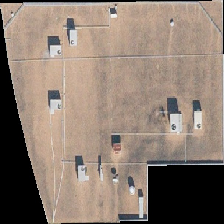

In [174]:
img0


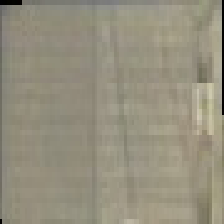

In [175]:
img1

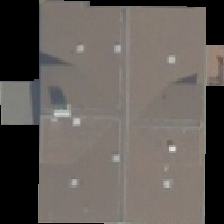

In [176]:
img2

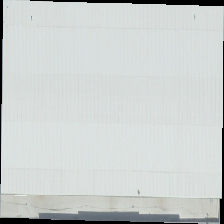

In [177]:
img97=img2 = load_img('/content/97.jpg', target_size=(224, 224))
img97

In [178]:
batch_size = 32
img_height = 240
img_width = 320

In [179]:
#PRETRAITEMENT DES DONNéES
# Conversion image (matrice de pixels) en un numpy array
def preprocess(image) :
    image = img_to_array(image)

    # Redimensionnage 
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # Preprocessing
    image = preprocess_input(image)
    
    return image

In [180]:
#PREDICTION DU MODEL
def pred_modele(image) :
    
    image = preprocess(image)
    # Prédiction
    y_pred = model.predict(image)

    # Conversion des probabilités en classe label
    label = decode_predictions(y_pred)
    
    # Affectation du label ayant la plus grande probabilité
    label = label[0][0]

 
    return ((label[1], label[2]*100))
img=[img0,img1,img97]

for i in range(3) :
    print("Prédiction image",i+1,":",pred_modele (img[i])[0], 'avec une probabilité de',round(pred_modele (img[i])[1],2),'%')


Prédiction image 1 : carton avec une probabilité de 57.58 %
Prédiction image 2 : sliding_door avec une probabilité de 30.15 %
Prédiction image 3 : sliding_door avec une probabilité de 37.19 %


In [181]:
#initialiser le CNN
seed = 1
np.random.seed(seed)
random.set_seed(seed)

# Initialising the CNN
classifier = Sequential()

In [182]:
classifier

In [183]:
# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (240,320, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPool2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
classifier.add(Flatten())

In [184]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 238, 318, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 117, 157, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 78, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 144768)            0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [215]:
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[500:], y_train[500:],
                x_train[:500], y_train[:500],
                x_test, y_test)

In [216]:
def build_mlp(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Flatten(input_shape=data.x_train.shape[1:]))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", 
                  metrics=["accuracy"])
    return model

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
x_test = pd.read_csv('/content/drive/MyDrive/test')
y_train=pd.read('/content/drive/MyDrive/train')
y_train = train['label'].values
#X = train.drop(['label'], axis=1).value


In [224]:
data = Data(x_train, y_train, None, None, x_test, y_test)
(x_train, y_train), (x_test, y_test) = data.load_data()


In [224]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [224]:
history = model.fit(train_images, train_labels, epochs=10)

In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [154]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [165]:
normalization_layer 